In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 
import numpy as np
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected='true')
import os
from datetime import datetime, timedelta

In [2]:
#full = pd.read_csv('./data/clean/dataset_consumo_clima_pandemia.csv', parse_dates = True, index_col = 0) #total

In [3]:
#full = pd.read_csv('./data/clean/dataset_consumo_clima_post_pand_p.csv', parse_dates = True, index_col = 0) #sin pandemia

In [4]:
#full = pd.read_csv('./data/clean/dataset_consumo_clima_pre_pand_p.csv', parse_dates = True, index_col = 0) #durante pandemia

# 3.1.1 Carga del Dataset dataset_consumo_clima

In [5]:
full = pd.read_csv('./data/clean/dataset_consumo_clima_pre_pand_p.csv', parse_dates = True, index_col = 0)

In [6]:
full

,energia_activa,TempCelcius,HR,pandemia,month,day,weekday,sin_hour,cos_hour
tiempo,,,,,,,,,
2017-01-01 00:00:00,827.4,25.881833,80.133333,0,1,1,6,0.000000,1.000000
2017-01-01 01:00:00,814.8,25.748167,80.750000,0,1,1,6,0.258819,0.965926
2017-01-01 02:00:00,798.0,25.800667,77.250000,0,1,1,6,0.500000,0.866025
2017-01-01 03:00:00,802.2,25.715500,76.050000,0,1,1,6,0.707107,0.707107
2017-01-01 04:00:00,793.8,25.525500,77.200000,0,1,1,6,0.866025,0.500000
...,...,...,...,...,...,...,...,...,...
2020-03-16 19:00:00,924.0,28.102000,81.733333,0,3,16,0,-0.965926,0.258819
2020-03-16 20:00:00,915.6,26.712167,86.316667,0,3,16,0,-0.866025,0.500000
2020-03-16 21:00:00,882.0,26.389833,84.916667,0,3,16,0,-0.707107,0.707107


In [7]:
elec = pd.DataFrame(full.pop('energia_activa'))

In [8]:
elec

,energia_activa
tiempo,
2017-01-01 00:00:00,827.4
2017-01-01 01:00:00,814.8
2017-01-01 02:00:00,798.0
2017-01-01 03:00:00,802.2
2017-01-01 04:00:00,793.8
...,...
2020-03-16 19:00:00,924.0
2020-03-16 20:00:00,915.6
2020-03-16 21:00:00,882.0


In [9]:
full = full.join(elec) 

In [10]:
full.head(13)

,TempCelcius,HR,pandemia,month,day,weekday,sin_hour,cos_hour,energia_activa
tiempo,,,,,,,,,
2017-01-01 00:00:00,25.881833,80.133333,0,1,1,6,0.000000e+00,1.000000e+00,827.4
2017-01-01 01:00:00,25.748167,80.750000,0,1,1,6,2.588190e-01,9.659258e-01,814.8
2017-01-01 02:00:00,25.800667,77.250000,0,1,1,6,5.000000e-01,8.660254e-01,798.0
2017-01-01 03:00:00,25.715500,76.050000,0,1,1,6,7.071068e-01,7.071068e-01,802.2
2017-01-01 04:00:00,25.525500,77.200000,0,1,1,6,8.660254e-01,5.000000e-01,793.8
2017-01-01 05:00:00,25.638667,77.766667,0,1,1,6,9.659258e-01,2.588190e-01,793.8
2017-01-01 06:00:00,25.282833,80.533333,0,1,1,6,1.000000e+00,6.123234e-17,760.2
2017-01-01 07:00:00,25.444667,81.166667,0,1,1,6,9.659258e-01,-2.588190e-01,688.8
2017-01-01 08:00:00,26.341500,78.533333,0,1,1,6,8.660254e-01,-5.000000e-01,676.2


# 3.1.2 Visualización de la variable a predecir

Se puede apreciar periodos de no consumo, esto puede deberse a cortes por mantenimiento de la red eléctrica

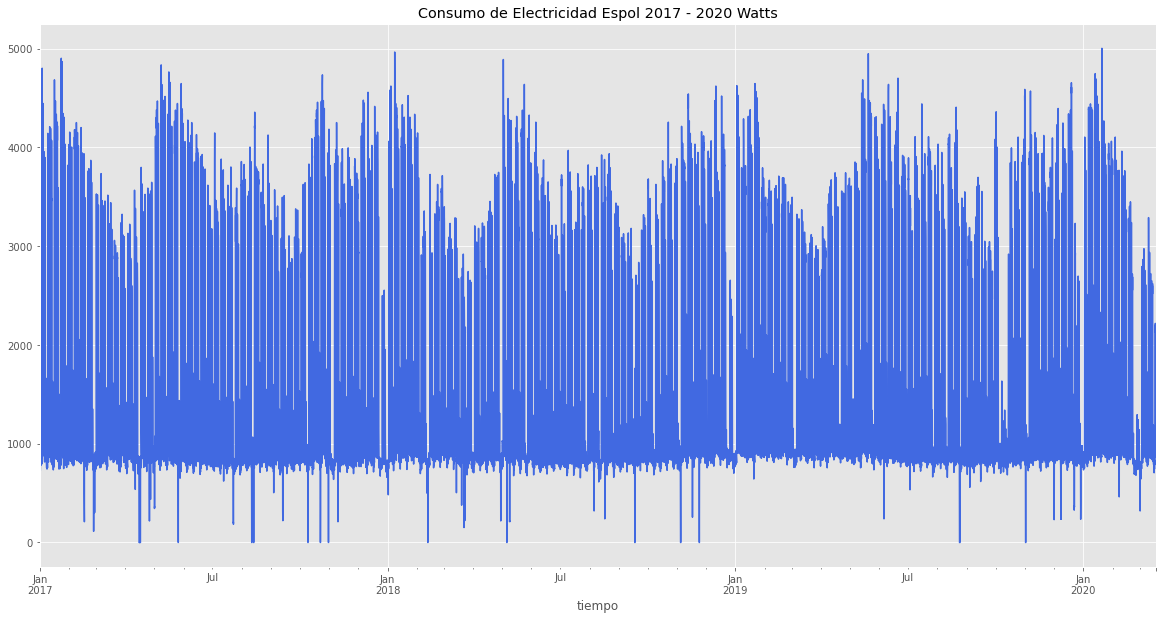

In [11]:
plt.style.use('ggplot')
full['energia_activa'].plot(title='Consumo de Electricidad Espol 2017 - 2020 Watts', figsize=(20,10), color='Royalblue');


# 3.1.3 Preprocesamiento de datos

En esta parte vamos a convertir el problema en un problema de Aprendisaje supervisado, esto se logra convirtiendo n entradas a una salida Y, en este caso usaremos n=12, la data referente a variables clima y variables de fecha y pandemia se convierten de la misma forma.

La siguiente función realiza esta conversión para n= 12

In [12]:
 # convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    #df = pd.DataFrame(data)
    df = data
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(data.shift(i))
        names += [('{}(t-{})'.format(j, i)) for j in data.columns]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('{}(t)'.format(j)) for j in data.columns]
        else:
            names += [('{}(t+{})'.format(j, i)) for j in data.columns]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [13]:
def weather_supervised(dataframe, n_in, n_out):
    df = dataframe.copy()
    df.pop('energia_activa')
    return series_to_supervised(data = df, n_in = n_in, n_out = n_out, dropnan=True)

def electric_supervised(dataframe, n_in, n_out):
    elec = pd.DataFrame(dataframe['energia_activa'])
    elec_sup = series_to_supervised(data = elec, n_in = n_in, n_out = n_out, dropnan=True)
    return elec_sup


In [14]:
observ = int(24/2)

In [15]:
electricity = electric_supervised(full, observ, 1) # toma las doce obcervaciones y llega hasta t
weather = weather_supervised(full, observ, 0)        # toma las doce observaciones y llega hasta t-1
full = weather.join(electricity)

#### Data frame with the input vectors and labels

In [16]:
full.head(13)

,TempCelcius(t-12),HR(t-12),pandemia(t-12),month(t-12),day(t-12),weekday(t-12),sin_hour(t-12),cos_hour(t-12),TempCelcius(t-11),HR(t-11),...,energia_activa(t-9),energia_activa(t-8),energia_activa(t-7),energia_activa(t-6),energia_activa(t-5),energia_activa(t-4),energia_activa(t-3),energia_activa(t-2),energia_activa(t-1),energia_activa(t)
tiempo,,,,,,,,,,,,,,,,,,,,,
2017-01-01 12:00:00,25.881833,80.133333,0.0,1.0,1.0,6.0,0.000000e+00,1.000000e+00,25.748167,80.750000,...,802.2,793.8,793.8,760.2,688.8,676.2,688.8,705.6,709.8,718.2
2017-01-01 13:00:00,25.748167,80.750000,0.0,1.0,1.0,6.0,2.588190e-01,9.659258e-01,25.800667,77.250000,...,793.8,793.8,760.2,688.8,676.2,688.8,705.6,709.8,718.2,730.8
2017-01-01 14:00:00,25.800667,77.250000,0.0,1.0,1.0,6.0,5.000000e-01,8.660254e-01,25.715500,76.050000,...,793.8,760.2,688.8,676.2,688.8,705.6,709.8,718.2,730.8,735.0
2017-01-01 15:00:00,25.715500,76.050000,0.0,1.0,1.0,6.0,7.071068e-01,7.071068e-01,25.525500,77.200000,...,760.2,688.8,676.2,688.8,705.6,709.8,718.2,730.8,735.0,726.6
2017-01-01 16:00:00,25.525500,77.200000,0.0,1.0,1.0,6.0,8.660254e-01,5.000000e-01,25.638667,77.766667,...,688.8,676.2,688.8,705.6,709.8,718.2,730.8,735.0,726.6,739.2
2017-01-01 17:00:00,25.638667,77.766667,0.0,1.0,1.0,6.0,9.659258e-01,2.588190e-01,25.282833,80.533333,...,676.2,688.8,705.6,709.8,718.2,730.8,735.0,726.6,739.2,747.6
2017-01-01 18:00:00,25.282833,80.533333,0.0,1.0,1.0,6.0,1.000000e+00,6.123234e-17,25.444667,81.166667,...,688.8,705.6,709.8,718.2,730.8,735.0,726.6,739.2,747.6,810.6
2017-01-01 19:00:00,25.444667,81.166667,0.0,1.0,1.0,6.0,9.659258e-01,-2.588190e-01,26.341500,78.533333,...,705.6,709.8,718.2,730.8,735.0,726.6,739.2,747.6,810.6,890.4
2017-01-01 20:00:00,26.341500,78.533333,0.0,1.0,1.0,6.0,8.660254e-01,-5.000000e-01,26.479500,78.166667,...,709.8,718.2,730.8,735.0,726.6,739.2,747.6,810.6,890.4,877.8


Separate data from labels

In [17]:
full.columns

Index(['TempCelcius(t-12)', 'HR(t-12)', 'pandemia(t-12)', 'month(t-12)',
       'day(t-12)', 'weekday(t-12)', 'sin_hour(t-12)', 'cos_hour(t-12)',
       'TempCelcius(t-11)', 'HR(t-11)',
       ...
       'energia_activa(t-9)', 'energia_activa(t-8)', 'energia_activa(t-7)',
       'energia_activa(t-6)', 'energia_activa(t-5)', 'energia_activa(t-4)',
       'energia_activa(t-3)', 'energia_activa(t-2)', 'energia_activa(t-1)',
       'energia_activa(t)'],
      dtype='object', length=109)

In [18]:
X = full.iloc[:,:-1]
y = full.iloc[:,-1:]

In [19]:
X.shape, y.shape

((28092, 108), (28092, 1))

In [20]:
X.head(13)

,TempCelcius(t-12),HR(t-12),pandemia(t-12),month(t-12),day(t-12),weekday(t-12),sin_hour(t-12),cos_hour(t-12),TempCelcius(t-11),HR(t-11),...,energia_activa(t-10),energia_activa(t-9),energia_activa(t-8),energia_activa(t-7),energia_activa(t-6),energia_activa(t-5),energia_activa(t-4),energia_activa(t-3),energia_activa(t-2),energia_activa(t-1)
tiempo,,,,,,,,,,,,,,,,,,,,,
2017-01-01 12:00:00,25.881833,80.133333,0.0,1.0,1.0,6.0,0.000000e+00,1.000000e+00,25.748167,80.750000,...,798.0,802.2,793.8,793.8,760.2,688.8,676.2,688.8,705.6,709.8
2017-01-01 13:00:00,25.748167,80.750000,0.0,1.0,1.0,6.0,2.588190e-01,9.659258e-01,25.800667,77.250000,...,802.2,793.8,793.8,760.2,688.8,676.2,688.8,705.6,709.8,718.2
2017-01-01 14:00:00,25.800667,77.250000,0.0,1.0,1.0,6.0,5.000000e-01,8.660254e-01,25.715500,76.050000,...,793.8,793.8,760.2,688.8,676.2,688.8,705.6,709.8,718.2,730.8
2017-01-01 15:00:00,25.715500,76.050000,0.0,1.0,1.0,6.0,7.071068e-01,7.071068e-01,25.525500,77.200000,...,793.8,760.2,688.8,676.2,688.8,705.6,709.8,718.2,730.8,735.0
2017-01-01 16:00:00,25.525500,77.200000,0.0,1.0,1.0,6.0,8.660254e-01,5.000000e-01,25.638667,77.766667,...,760.2,688.8,676.2,688.8,705.6,709.8,718.2,730.8,735.0,726.6
2017-01-01 17:00:00,25.638667,77.766667,0.0,1.0,1.0,6.0,9.659258e-01,2.588190e-01,25.282833,80.533333,...,688.8,676.2,688.8,705.6,709.8,718.2,730.8,735.0,726.6,739.2
2017-01-01 18:00:00,25.282833,80.533333,0.0,1.0,1.0,6.0,1.000000e+00,6.123234e-17,25.444667,81.166667,...,676.2,688.8,705.6,709.8,718.2,730.8,735.0,726.6,739.2,747.6
2017-01-01 19:00:00,25.444667,81.166667,0.0,1.0,1.0,6.0,9.659258e-01,-2.588190e-01,26.341500,78.533333,...,688.8,705.6,709.8,718.2,730.8,735.0,726.6,739.2,747.6,810.6
2017-01-01 20:00:00,26.341500,78.533333,0.0,1.0,1.0,6.0,8.660254e-01,-5.000000e-01,26.479500,78.166667,...,705.6,709.8,718.2,730.8,735.0,726.6,739.2,747.6,810.6,890.4


In [21]:
y

,energia_activa(t)
tiempo,
2017-01-01 12:00:00,718.2
2017-01-01 13:00:00,730.8
2017-01-01 14:00:00,735.0
2017-01-01 15:00:00,726.6
2017-01-01 16:00:00,739.2
...,...
2020-03-16 19:00:00,924.0
2020-03-16 20:00:00,915.6
2020-03-16 21:00:00,882.0


Se contruye las Normalizadas aplicando MinMax a Y y Estandar Escaler

In [22]:
mm = MinMaxScaler()
ss = StandardScaler()


X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

In [23]:
X_ss

array([[ 0.05799978, -0.23564128,  0.        , ..., -0.83166412,
        -0.81600142, -0.81209186],
       [ 0.01351626, -0.17044096,  0.        , ..., -0.81599112,
        -0.81208315, -0.80425529],
       [ 0.03098797, -0.54049685,  0.        , ..., -0.81207287,
        -0.80424661, -0.79250043],
       ...,
       [-0.26497716,  1.68160064,  0.        , ..., -0.49861279,
        -0.6122514 , -0.62009587],
       [ 0.18252034,  1.31683127,  0.        , ..., -0.61224207,
        -0.62008794, -0.65144215],
       [ 0.49889686,  0.81813691,  0.        , ..., -0.62007857,
        -0.65143409, -0.66319701]])

In [24]:
y_mm

array([[0.14357683],
       [0.14609572],
       [0.14693535],
       ...,
       [0.17632242],
       [0.17380353],
       [0.17380353]])

Se divide el dataset en entrenamiento y pruebas 75/25 %

In [25]:
full.shape

(28092, 109)

In [26]:
#Se divide la data en 75% para entranamiento 
#25% para pruebas
train_hours = int(2*full.shape[0]/3)

X_train = X_ss[:train_hours, :]
X_test = X_ss[train_hours:, :]
y_train = y_mm[:train_hours, :]
y_test = y_mm[train_hours:, :]

#to tensors and variables
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

In [27]:
X_train_tensors.shape

torch.Size([18728, 108])

Se reordena los datos para agregar la información de secuencia

In [28]:
#reshaping to rows, timestamps, features
seq = 1
X_train_tensors_final = torch.reshape(X_train_tensors,   (int(X_train_tensors.shape[0]/seq), seq, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (int(X_test_tensors.shape[0]/seq), seq, X_test_tensors.shape[1])) 

In [29]:
X_train_tensors_final.shape

torch.Size([18728, 1, 108])

# 3.1.4 Contrucción del modelo

El modelo consiste en una capa LSTM seguida por dos full connected y capas de activación RELU

In [30]:
class LSTM_E_1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length, num_dir, device):
        super(LSTM_E_1, self).__init__()

        self.device = device
        self.num_classes = num_classes #number of outputs
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length
        self.num_directions = num_dir

        if num_dir == 2:
            bi = True
        else: 
            bi = False

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True, bidirectional = bi )
        self.fc_1 =  nn.Linear(hidden_size*num_dir, 100)
        self.fc = nn.Linear(100, num_classes)

        self.relu = nn.ReLU() 

    def forward(self,x):
        h_0 = Variable(torch.zeros(
              self.num_layers*self.num_directions, x.size(0), self.hidden_size)).to(self.device)
        c_0 = Variable(torch.zeros(
              self.num_layers*self.num_directions, x.size(0), self.hidden_size)).to(self.device)

        
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) 
        #print(output.shape)
        out = output.view(-1, self.hidden_size*self.num_directions)
        #print(out.shape)
        out = self.relu(out)
        out = self.fc_1(out) 
        out = self.relu(out) 
        out = self.fc(out) 
        #print(out.shape)
        
        return out 

Se crea o se carga el modelo en caso de existir

In [31]:
#se analiza modelo previo alamacenado
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
    
if os.path.isfile('./data/models/model_LSTM_1_checkpoint.tar'):
    #load the model
    model = LSTM_E_1(num_classes = 1, input_size = X_train_tensors_final.shape[2], hidden_size=133, num_layers=1, seq_length=X_train_tensors_final.shape[1],  num_dir = 1, device=device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    model.to(device)
    # Make sure to call input = input.to(device) on any input tensors that you feed to the model

    checkpoint = torch.load('./data/models/model_LSTM_1_checkpoint.tar', map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    print(model)
    
else:
    model = LSTM_E_1(num_classes = 1, input_size = X_train_tensors_final.shape[2], hidden_size=133, num_layers=1, seq_length=X_train_tensors_final.shape[1],  num_dir = 1, device=device)
    model.to(device)
    print(model)


LSTM_E_1(
  (lstm): LSTM(108, 133, batch_first=True)
  (fc_1): Linear(in_features=133, out_features=100, bias=True)
  (fc): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)


Se define el metodo para el Loss Criterion, el optimizador y el learning rate

In [32]:
learning_rate = 0.01 #0.001 lr
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 
num_epochs = 500 #1000 epochs

Epoch: 0, loss: 0.12238, val_loss: 0.03269
Epoch: 50, loss: 0.00145, val_loss: 0.00168
Epoch: 100, loss: 0.00076, val_loss: 0.00081
Epoch: 150, loss: 0.00056, val_loss: 0.00060
Epoch: 200, loss: 0.00048, val_loss: 0.00052
Epoch: 250, loss: 0.00042, val_loss: 0.00047
Epoch: 300, loss: 0.00039, val_loss: 0.00045
Epoch: 350, loss: 0.00036, val_loss: 0.00046
Epoch: 400, loss: 0.00035, val_loss: 0.00043
Epoch: 450, loss: 0.00032, val_loss: 0.00043


Text(0, 0.5, 'MSE loss')

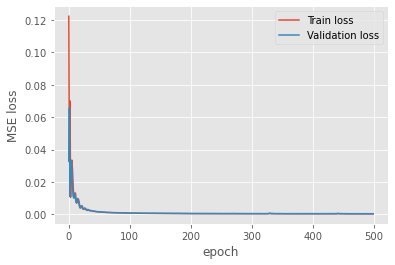

In [33]:
#Entrenamiento
model.train()

train_loss = []
val_loss = []
X_test_tensors_final = X_test_tensors_final.to(device)
y_test_tensors = y_test_tensors.to(device)
X_train_tensors_final = X_train_tensors_final.to(device)
y_train_tensors = y_train_tensors.to(device)

for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_final) #forward pass
    optimizer.zero_grad() #Calculo del gradiente, inicializa en 0
    # Se obtiene la matriz de error  
    loss = criterion(outputs, y_train_tensors)
    train_loss.append(loss.item())
    loss.backward() #Calculo del error y de la función de error
    optimizer.step() #Optimización del error realizando el backpropagation

    #validation
    val_out = model.forward(X_test_tensors_final)
    loss_val =criterion(val_out, y_test_tensors)
    val_loss.append(loss_val.item())

    if epoch % 50 == 0:
        print("Epoch: %d, loss: %1.5f, val_loss: %1.5f" % (epoch, train_loss[epoch], val_loss[epoch])) 

epoch = np.arange(0,num_epochs)

#plotting
plt.plot(epoch, train_loss, label = "Train loss")
plt.plot(epoch, val_loss, label = "Validation loss")
plt.legend()
plt.xlabel('epoch')
plt.ylabel('MSE loss')

In [34]:
#Guarda el modelo de entrenamiento
torch.save({
            'epoch': len(epoch),
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss.item(),
            }, './data/models/model_LSTM_1_checkpoint.tar')

# 3.1.5 Validación del modelo

Normalizacion de la data de Pruebas

In [35]:
df_X_ss = ss.transform(full.iloc[:,:-1]) #Normalización
df_y_mm = mm.transform(full.iloc[:,-1:]) #Normalización
df_X_ss = Variable(torch.Tensor(df_X_ss)) #conversion a tensores
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1])) 

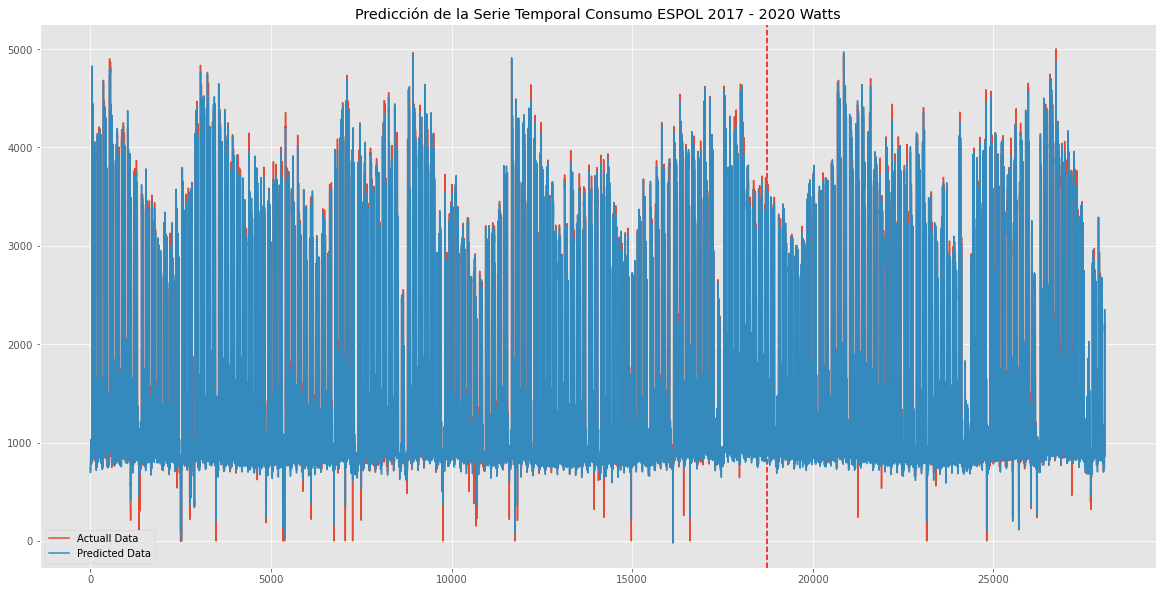

Test RMSE: 88.381


In [36]:
model.eval()

train_predict = model(df_X_ss.to(device))#forward pass
data_predict = train_predict.cpu().data.numpy() #conversión a numpy
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #normalización reversa
dataY_plot = mm.inverse_transform(dataY_plot)

plt.figure(figsize=(20,10)) #plotting
plt.axvline(x=train_hours, c='r', linestyle='--') #marca de los datos de entrenamiento

plt.plot(dataY_plot, label='Actuall Data') #gráfico de data Actual
plt.plot(data_predict, label='Predicted Data') #Gráfico de data predicha
plt.title('Predicción de la Serie Temporal Consumo ESPOL 2017 - 2020 Watts')
plt.legend()
plt.show() 

rmse = np.sqrt(mean_squared_error(dataY_plot, data_predict ))
print('Test RMSE: %.3f' % rmse)

# Gráfica de datos de prueba vs valores reales

In [37]:
Predicted = go.Scatter(x=y[train_hours:].index, y=data_predict[train_hours:].flatten(), opacity = 1, name = 'Predicción', line=dict(color='crimson'), yaxis='y')
Actual = go.Scatter(x=y[train_hours:].index, y=y['energia_activa(t)'][train_hours:].values, opacity = 0.7, name = 'Consumo actual', line=dict(color='royalBlue'), yaxis='y')
layout = go.Layout(title='Predicción del consumo Eléctrico Datos de Prueba', xaxis=dict(title='Hora'),
                   yaxis=dict(title='Watts', overlaying='y'),
                  yaxis2=dict(title='Watts', side='right'))
fig = go.Figure(data=[Predicted, Actual], layout=layout)
fig.show() # si se usa colab use fig.show(renderer='colab')

## Predicción usando datos de consumo predichos

In [38]:
full = pd.read_csv('./data/clean/dataset_consumo_clima_pre_pand_p.csv', parse_dates = True, index_col = 0)
elec = pd.DataFrame(full.pop('energia_activa'))
full = full.join(elec) 

In [39]:
full

,TempCelcius,HR,pandemia,month,day,weekday,sin_hour,cos_hour,energia_activa
tiempo,,,,,,,,,
2017-01-01 00:00:00,25.881833,80.133333,0,1,1,6,0.000000,1.000000,827.4
2017-01-01 01:00:00,25.748167,80.750000,0,1,1,6,0.258819,0.965926,814.8
2017-01-01 02:00:00,25.800667,77.250000,0,1,1,6,0.500000,0.866025,798.0
2017-01-01 03:00:00,25.715500,76.050000,0,1,1,6,0.707107,0.707107,802.2
2017-01-01 04:00:00,25.525500,77.200000,0,1,1,6,0.866025,0.500000,793.8
...,...,...,...,...,...,...,...,...,...
2020-03-16 19:00:00,28.102000,81.733333,0,3,16,0,-0.965926,0.258819,924.0
2020-03-16 20:00:00,26.712167,86.316667,0,3,16,0,-0.866025,0.500000,915.6
2020-03-16 21:00:00,26.389833,84.916667,0,3,16,0,-0.707107,0.707107,882.0


In [40]:
full.shape

(28104, 9)

In [41]:
dia = 1*24*7

In [42]:
mes = 31*24

In [43]:
trimestre = 31*3*24

In [44]:
semestre = 31*6*24

In [45]:
semestre

4464

In [46]:
dia

168

In [47]:
prev_fut = full.iloc[-semestre:-1,:] #dias equivalentes al tamano de la data a predecir

In [48]:
prev_fut

,TempCelcius,HR,pandemia,month,day,weekday,sin_hour,cos_hour,energia_activa
tiempo,,,,,,,,,
2019-09-13 00:00:00,20.110500,86.100000,0,9,13,4,0.000000,1.000000e+00,827.4
2019-09-13 01:00:00,19.956000,86.600000,0,9,13,4,0.258819,9.659258e-01,831.6
2019-09-13 02:00:00,19.686167,87.333333,0,9,13,4,0.500000,8.660254e-01,819.0
2019-09-13 03:00:00,19.622833,88.066667,0,9,13,4,0.707107,7.071068e-01,814.8
2019-09-13 04:00:00,19.603000,88.666667,0,9,13,4,0.866025,5.000000e-01,819.0
...,...,...,...,...,...,...,...,...,...
2020-03-16 18:00:00,28.816167,79.233333,0,3,16,0,-1.000000,-1.836970e-16,1045.8
2020-03-16 19:00:00,28.102000,81.733333,0,3,16,0,-0.965926,2.588190e-01,924.0
2020-03-16 20:00:00,26.712167,86.316667,0,3,16,0,-0.866025,5.000000e-01,915.6


In [49]:
prev_fut.shape

(4463, 9)

In [50]:
prev_fut

,TempCelcius,HR,pandemia,month,day,weekday,sin_hour,cos_hour,energia_activa
tiempo,,,,,,,,,
2019-09-13 00:00:00,20.110500,86.100000,0,9,13,4,0.000000,1.000000e+00,827.4
2019-09-13 01:00:00,19.956000,86.600000,0,9,13,4,0.258819,9.659258e-01,831.6
2019-09-13 02:00:00,19.686167,87.333333,0,9,13,4,0.500000,8.660254e-01,819.0
2019-09-13 03:00:00,19.622833,88.066667,0,9,13,4,0.707107,7.071068e-01,814.8
2019-09-13 04:00:00,19.603000,88.666667,0,9,13,4,0.866025,5.000000e-01,819.0
...,...,...,...,...,...,...,...,...,...
2020-03-16 18:00:00,28.816167,79.233333,0,3,16,0,-1.000000,-1.836970e-16,1045.8
2020-03-16 19:00:00,28.102000,81.733333,0,3,16,0,-0.965926,2.588190e-01,924.0
2020-03-16 20:00:00,26.712167,86.316667,0,3,16,0,-0.866025,5.000000e-01,915.6


In [51]:
def daily_consumption_forecast_1(previous_df):
    '''
    Toma la data de clima y el consumo, predice el siguiente valor
    '''
    actual_val = pd.DataFrame(data = previous_df.values, columns = previous_df.columns, index = previous_df.index)
    y_predic = []
    for i in range(previous_df.shape[0]-observ):
        #filter out from data frame the 12+1 values which will be used
        #to generate the input tensor. This includes the last predicted value.
        previous = previous_df.iloc[i:i + (observ+1),:]
        #prepare and generate input array
        electricity = electric_supervised(previous, observ, 1)
        weather = weather_supervised(previous, observ, 0)
        in_previous = weather.join(electricity)
        # select inputs and targets
        X_previous = in_previous.iloc[:,:-1]
        y_previous = in_previous.iloc[:,-1:]
        #normalization
        X_val = ss.transform(X_previous)
        y_val = mm.transform(y_previous) 
        #from array to tensors and variables
        X_val_tensors = Variable(torch.Tensor(X_val))
        y_val_tensors = Variable(torch.Tensor(y_val))
        #reshape input tensor
        seq = 1
        X_val_tensors_final = torch.reshape(X_val_tensors,(int(X_val_tensors.shape[0]/seq), seq, X_val_tensors.shape[1]))
        #forward pass
        model.eval()
        y_pred = model.forward(X_val_tensors_final.to(device))
        #reverse normalization
        y_predict = y_pred.cpu().data.numpy() #numpy conversion
        y_predict = mm.inverse_transform(y_predict)
        #add to dataframe the calculated value for the next hour
        aux = previous['energia_activa'].values.tolist()
        aux[observ] = y_predict.item()
        y_predic.append(y_predict.item())
        previous_df.iloc[i:i + (observ+1),-1:] = aux
        
    prediction = pd.DataFrame(data = previous_df.values, columns = previous_df.columns, index = previous_df.index)

    return prediction, actual_val, y_predic

In [52]:
pd.options.mode.chained_assignment = None
pred,act, y_f = daily_consumption_forecast_1(prev_fut)

In [53]:
Predicted = go.Scatter(x=act.iloc[observ:,:].index, y=np.array(y_f), opacity = 0.7, name = 'Consumo Eléctrico Predicho', line=dict(color='crimson'), yaxis='y')
Actual = go.Scatter(x=act.index, y=act['energia_activa'].values, opacity = 0.7, name = 'Consumo Eléctrico Actual', line=dict(color='royalBlue'), yaxis='y')
#Actual2 = go.Scatter(x=act.index, y=pred['electricity'].values, opacity = 0.7, name = 'Actual Value2', line=dict(color='Blue'), yaxis='y')
layout = go.Layout(title='Predicción del Consumo Eléctrico Espol', xaxis=dict(title='Hora'),
                   yaxis=dict(title='Watts', overlaying='y'),
                  yaxis2=dict(title='Watts', side='right'))
fig = go.Figure(data=[Actual, Predicted], layout=layout)
fig.show() # para correr en colab use fig.show(renderer='colab')

In [54]:
rmse = np.sqrt(mean_squared_error(act['energia_activa'].values[observ:], np.array(y_f)))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 419.787


In [55]:
def calculate_metrics(act, y_f):
    result_metrics = {'mae' : mean_absolute_error(act['energia_activa'].values[observ:], np.array(y_f)),
                      'rmse' : np.sqrt(mean_squared_error(act['energia_activa'].values[observ:], np.array(y_f))),
                      'r2' : r2_score(act['energia_activa'].values[observ:], np.array(y_f)),
                       'mape' : mean_absolute_percentage_error(act['energia_activa'].values[observ:], np.array(y_f))}
    
    print("Mean Absolute Error:           ", result_metrics["mae"])
    print("Root Mean Squared Error:       ", result_metrics["rmse"])
    print("R^2 Score:                     ", result_metrics["r2"])
    print("MAPE error:                    ", result_metrics["mape"])
    return result_metrics

result_metrics = calculate_metrics(act, y_f)

Mean Absolute Error:            209.9352055731529
Root Mean Squared Error:        419.78684785410445
R^2 Score:                      0.8437069284522328
MAPE error:                     1.676408111769914e+16
